# Gaussian Processes for Machine Learning

[link](https://sandipanweb.wordpress.com/2020/12/08/gaussian-process-regression-with-python/)



* GP = takes two parameters: the mean (m) and the kernel function (k)

* Given training data points (X,y) the goal is to learn a function f

* Then can use the function to predict the y value for unseen data points Xtest 

In [1]:
import numpy as np 

# Generate the data points 

def gen_points(n=10, var=1e-6): 
    np.random.seed(123)
    # Generates a sample of x values from the uniform distribution
    X = np.random.uniform(-3, 3, (n, 1))
    # Evaluates y sample as the sin of X plus random Gaussian noise 
    y = np.sin(X) + np.random.randn()
    return X, y
    

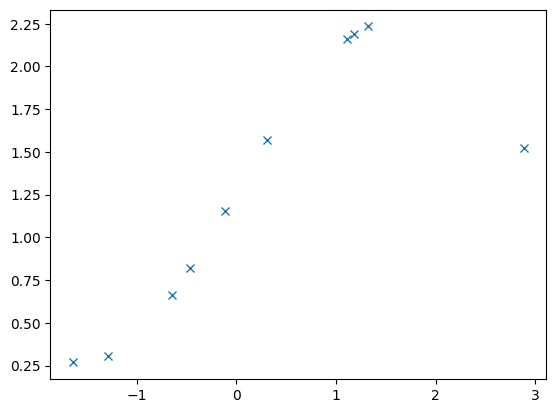

In [5]:
# Plotting the sample data points 

import matplotlib.pylab as plt 

# Generates the X and y points 
X, y = gen_points()

# Plots a scatter plot of the data
plt.plot(X, y, 'x')
plt.show()




In [11]:
# Generates 100 test data points 
Xtest, ytest = gen_points()

# Sorts the data by ascending x values 
Xtest.sort(axis=0)


## Squared Exponential Kernel Formula 

The formula for the squared exponential kernel is: 
$$
k(x_1, x_2) := \sigma^2 \exp(-\frac{||x_1 - x_2||^2}{(2l^2)})
$$

with the lengthscale: $l > 0$ and the variance $\sigma^2 > 0$


In [34]:
# Define the se kernel function
def se_kernel(x, y, sigma=1, length=1): 
        return float(sigma*np.exp(-np.linalg.norm(x - y)**2/(2*length**2)))


In [36]:
n = len(Xtest)

K = se_kernel(Xtest, Xtest)

noise_var = 1
n_samples = 100
L = np.linalg.cholesky(K + noise_var*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n, n_samples)))
